In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox

import warnings


warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

st_perf = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [3]:
# 1 Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
# 2 Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking
#  a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally 
#  distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
# 3 Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is 
#  to explain the determinants of success in exams, which variables in our dataset might be useful?

In [4]:
# winsorize first
st_perf["math score"] = winsorize(st_perf["math score"], (0.05, 0))
st_perf["reading score"] = winsorize(st_perf["reading score"], (0.05, 0))
st_perf["writing score"] = winsorize(st_perf["writing score"], (0.05, 0))


Text(0.5, 1.0, 'original writing histogram')

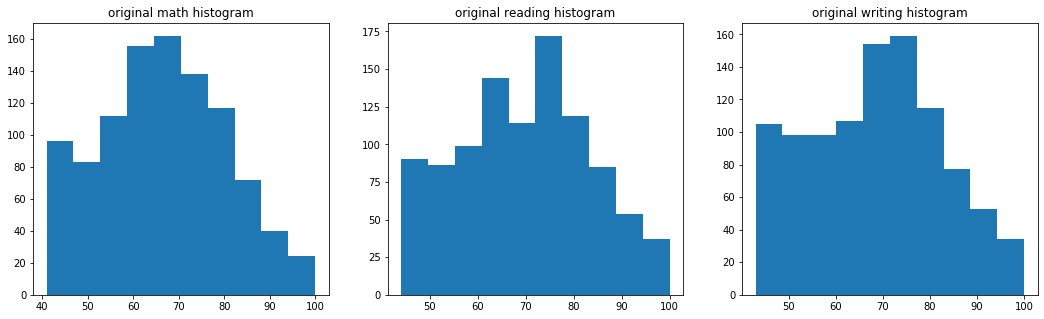

In [5]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(st_perf["math score"])
plt.title("original math histogram")


plt.subplot(1,3,2)
plt.hist(st_perf["reading score"])
plt.title("original reading histogram")


plt.subplot(1,3,3)
plt.hist(st_perf["writing score"])
plt.title("original writing histogram")

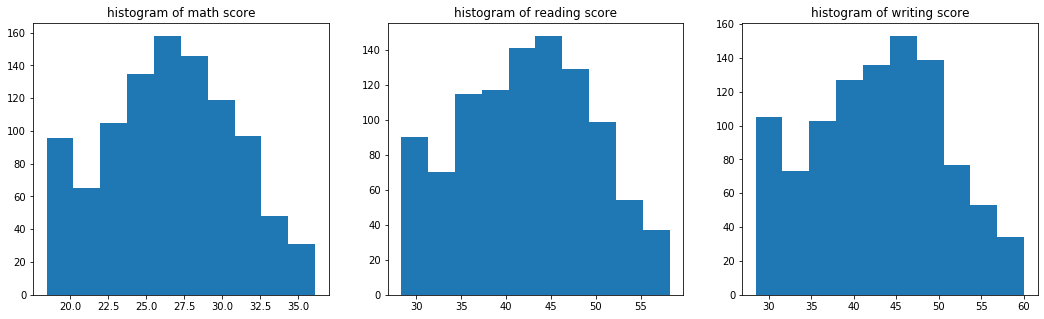

In [6]:
# box-cox
math_boxcox,_ = boxcox(st_perf["math score"])
reading_boxcox,_ = boxcox(st_perf["reading score"])
writing_boxcox,_ = boxcox(st_perf["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing score")

plt.show()




In [8]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 17.19217572969666 and p value is 0.0001848274511049297
Normality test statistics is 37.78627650847278 and p value is 6.234682045416305e-09
Jarque-Bera test statistics is 19.249002286555715 and p value is 6.608946898245538e-05
Normality test statistics is 45.101117240201404 and p value is 1.6084843045632892e-10
Jarque-Bera test statistics is 21.726941527549442 and p value is 1.914496571631119e-05
Normality test statistics is 54.96158760228548 and p value is 1.16209837484974e-12


In [ ]:
#Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking
#  a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally 
#  distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed

In [9]:
st_perf["score_average"] = st_perf[["math score", "reading score", "writing score"]].mean(axis=1)


In [13]:
st_perf["score_average"].head(10)

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
5    77.333333
6    91.666667
7    42.666667
8    65.000000
9    50.333333
Name: score_average, dtype: float64

Text(0.5, 1.0, 'histogram of new var')

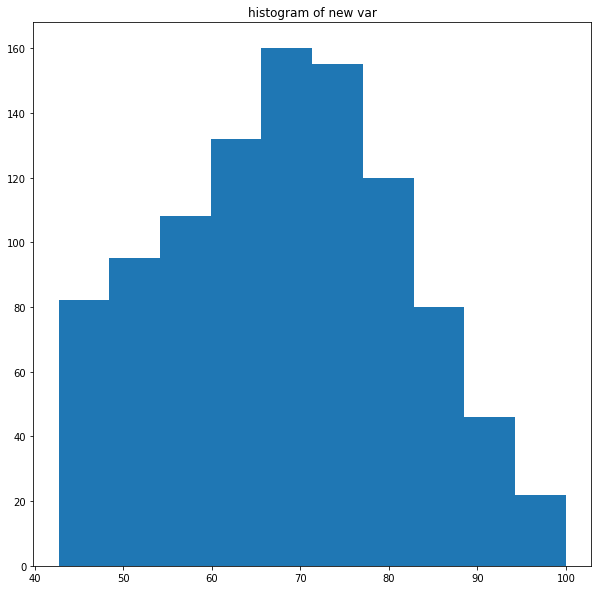

In [14]:
plt.figure(figsize=(10,10))
plt.hist(st_perf["score_average"])
plt.title("histogram of new var")

In [15]:
average_boxcox,_ = boxcox(st_perf["score_average"])

Text(0.5, 1.0, 'histogram of boxcox new var')

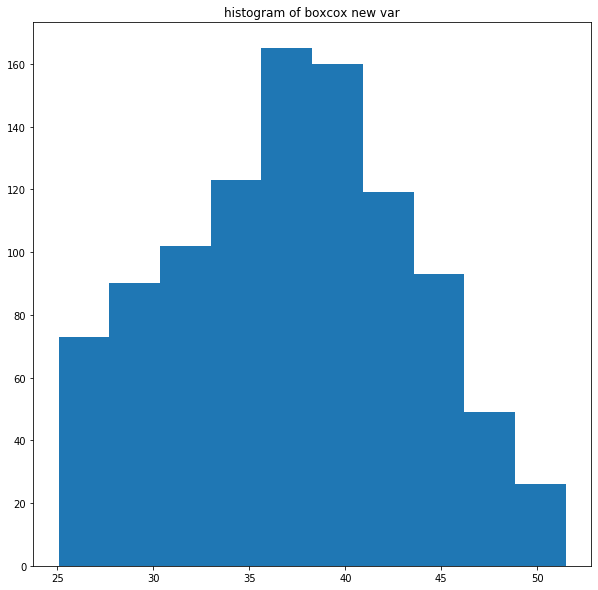

In [16]:
plt.figure(figsize=(10,10))
plt.hist(average_boxcox)
plt.title("histogram of boxcox new var")

In [ ]:
# question 3

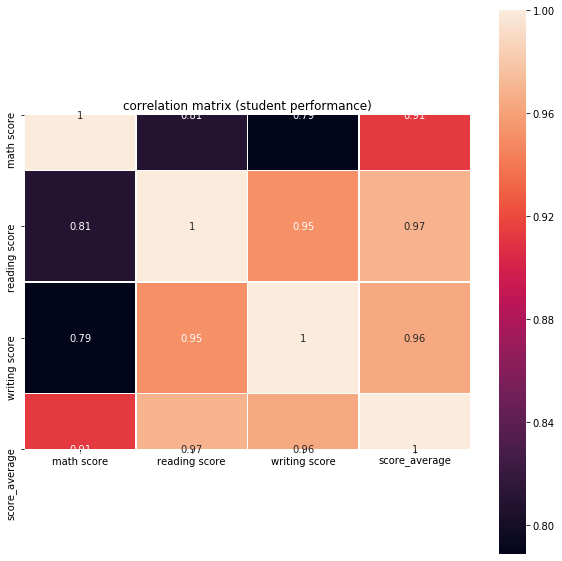

In [26]:
corr_stperf=st_perf.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_stperf,square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")
plt.show()

ValueError: num must be 1 <= num <= 3, not 4

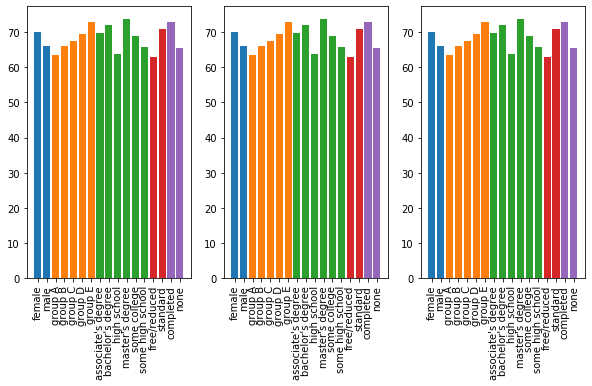

In [40]:
plt.figure(figsize=(10,5))
list = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for i in range(1, (len(list)+1)):
    for var in ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]:
        plt.subplot(1,3,i)
        plt.bar(st_perf.groupby(var)["score_average"].mean().index, st_perf.groupby(var)["score_average"].mean())
        plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()
    


([0, 1], <a list of 2 Text xticklabel objects>)

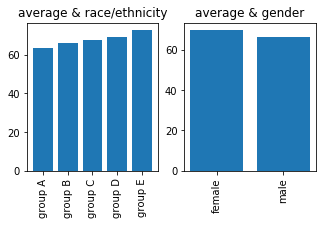

In [43]:
plt.figure(figsize=(8,6))
plt.subplot(2, 3, 1)
plt.bar(st_perf.groupby("race/ethnicity")["score_average"].mean().index, st_perf.groupby("race/ethnicity")["score_average"].mean())

plt.title("average & race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(st_perf.groupby("gender")["score_average"].mean().index, st_perf.groupby("gender")["score_average"].mean())

plt.title("average & gender")
plt.xticks(rotation="vertical")